# BBNaija
 
**Basically, this is me obviously having some fun.**

I decided to predict the housemate to be evicted from the Big Brother Nigeria TV Show based on viewers tweets using the vader sentiment analysis from nltk, So enjoy.

In this repo you will find:
- The codes I used for scraping data from twitter 
- The codes used for the analysis and making the plot as one function

In [22]:
# Run this code if you just installed nltk

import nltk

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\OLADE
[nltk_data]     ADEDAMOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\OLADE
[nltk_data]     ADEDAMOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

relevant columns selected
data cleaned
for dorathy, 
rating: 0.12371565369196949 
count: 29592432.515800003 
relevant columns selected
data cleaned
for kiddwaya, 
rating: 0.10099205362190099 
count: 15485989.101799998 
relevant columns selected


C:\Users\Francitoye\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


data cleaned
for ozo, 
rating: 0.05793930619588441 
count: 18328624.181 
relevant columns selected
data cleaned
for prince, 
rating: 0.08467828487716925 
count: 26672940.309599996 


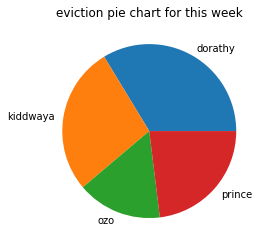

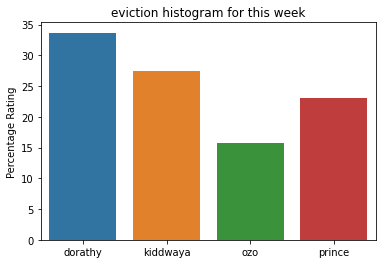

,housemate,rating
0,dorathy,33.6801
1,kiddwaya,27.4939
2,ozo,15.7733
3,prince,23.0527


In [13]:
valid = {}

filename = {}

data = {}

plt_data = {}

path = 'Scraped_tweets/'

#path = 'C:/Users/Francitoye/Documents/Github/BBNaija/Scraped_tweets/'


def bbnaija(path):
    '''A function that performs sentiment analysis comparison for a group of scraped tweets as long as the scraped data are in seperate csv file.
    
    This function takes in only the path to the tweet to be analysed.
    
    '''
    
    # Importing necessary library
    import seaborn as sns
    import nltk
    import matplotlib.pyplot as plt
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyser = SentimentIntensityAnalyzer()
    import numpy as np
    import pandas as pd
    import os
    
    tweet = os.listdir(path = path)


    def cleaner(data, column):
        data[column] = data[column].apply(lambda text: text.strip('[]'))
        data[column] = data[column].apply(lambda text: text.split('/'))
        data[column] = data[column].apply(lambda text: '' if len(text)<2 else text[2])
        print('data cleaned')
        
    def remove_ads(i):
        '''This function removes ads post from our data'''
        if len(i)>2:
            if i != 'twitter.com':
                return np.NaN
            else:
                return i
        return i
    
    for index,value in enumerate(tweet):
        a = value.split('.')
        if len(a) > 1:
            if a[1] == 'csv':
                valid[index] = a[1]
                filename[index] = a[0]
        else:
            pass
    
    for i,j in filename.items():

        name = tweet[i]
        df = pd.read_csv(path+name)
        df = df[['date', 'time', 'name', 'tweet', 'mentions', 'urls']]
        print('relevant columns selected')
    
        colu = df.columns.to_list()
        cleaner(df, 'urls')

        df['urls'] = df['urls'].apply(remove_ads)
        df['scores'] = df['tweet'].apply(lambda review: analyser.polarity_scores(review))

        df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

        df.dropna(inplace = True)

        row, column = df.shape

        rating = df['compound'].sum() / row
        count = df['compound'].sum() * row
        
        plt_data[j] = rating
        
        print(f'for {j}, \nrating: {rating} \ncount: {count} \n================================')
    total = sum(list(plt_data.values()))
    
    for i,j in plt_data.items():
        data[i] = j/total * 100
        
    x = list(data.keys())
    y = list(data.values())
    
    df =  pd.DataFrame(data = (x,y), index=['housemate', 'rating'])

    df = df.T
    
    plt.pie(labels = x, x = y)
    plt.title(f'eviction pie chart for this week')
    plt.savefig(fname = path+'bbnaija_pie.png', dpi = 500)
    plt.show()
    
    sns.barplot(x, y)
    plt.title(f'eviction histogram for this week')
    plt.ylabel('Percentage Rating')
    plt.savefig(fname = path+'bbnaija_bar.png', dpi = 500)
    plt.show()
    
    return df

bbnaija(path = path)

--
# Yeah! It was short!

That is it and this is the output!

<img src="Scraped_tweets/bbnaija_bar.png" alt="barchart showing housemate rating" width="70%" height="70%">